# Linear Regression Jupyter Notebook

This project aims at predicting the chance of a student getting admitted based on features such as scores in various exams, CGPA, SOP, LOR and Reasearch works done.

* We will be using Linear Regression for this mini project.
* The dataset has been taken from https://www.kaggle.com/mohansacharya/graduate-admissions

**Importing Libraries**

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading Dataset**

In [34]:
df = pd.read_csv('C:\\Users\\HP\\Desktop\\Admission.csv')

**Getting insight of the dataset**

In [35]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [37]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Dropping the Serial No. Field - Not Significant**

In [38]:
df = df.drop(columns=['Serial No.'])

In [39]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

**Data Visualisation**

In [40]:
sns.set_palette("GnBu_r")
sns.set_style('whitegrid')

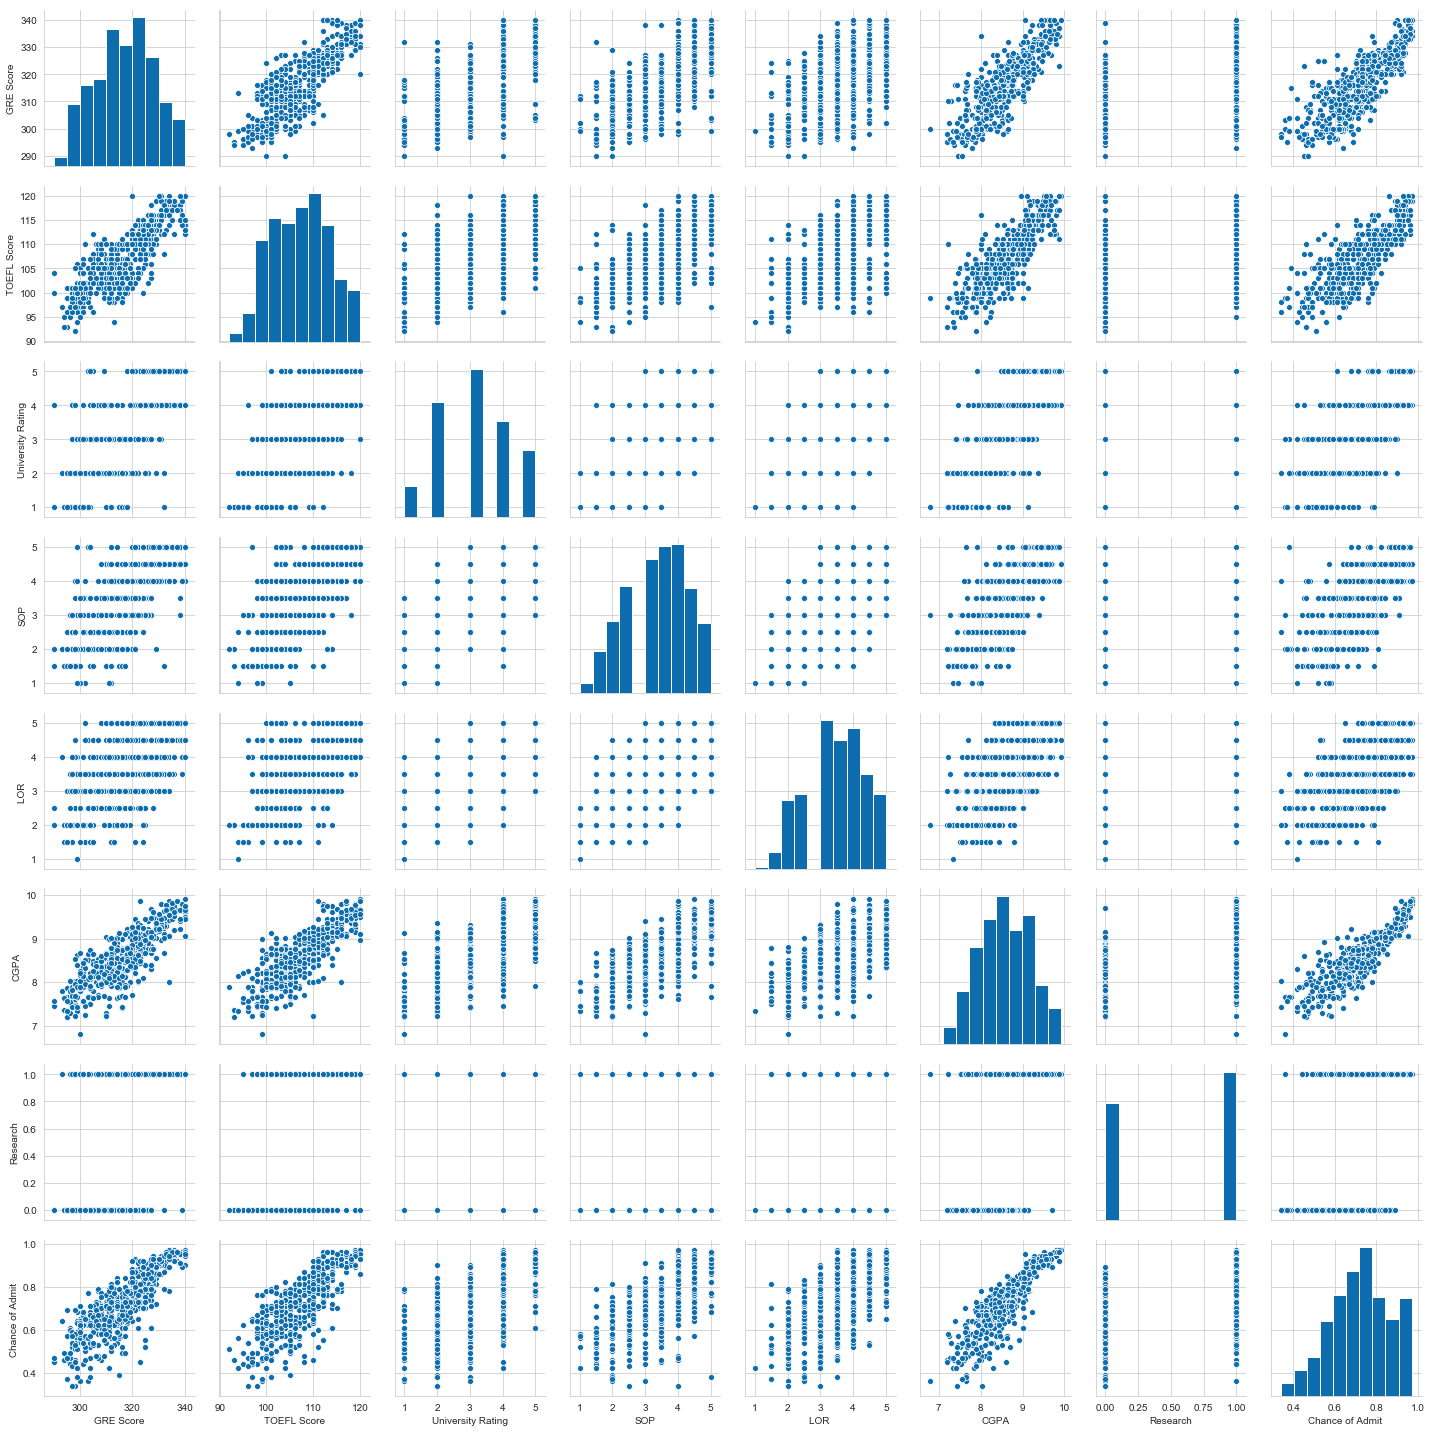

In [41]:
sns.pairplot(df)

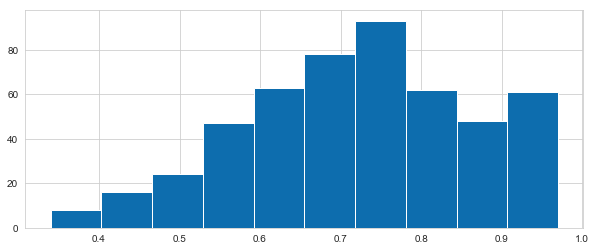

In [42]:
df['Chance of Admit '].hist(figsize=(10,4))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020DA8D0D320>],
      dtype=object)

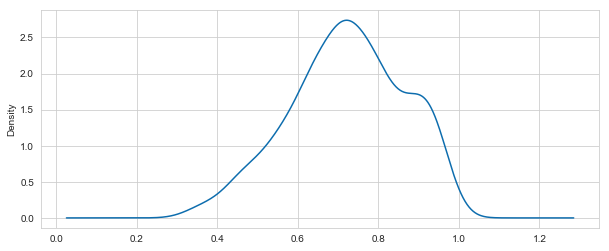

In [43]:
df['Chance of Admit '].plot(kind='density', subplots=True,figsize=(10,4))

* Let see the correlation of the field to the Chance of Admission

In [44]:
corr_matrix = df.corr()

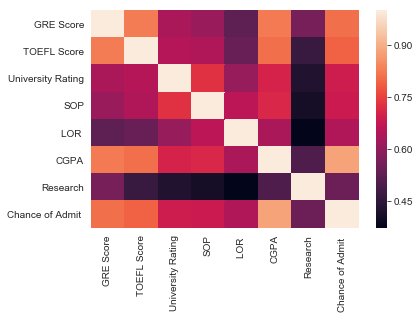

In [45]:
sns.heatmap(corr_matrix)

* It looks apparently that the chance of Admission depends heavily on CGPA, GRE Score and TOEFL Score
* It looks from heatmap that Research influences the result the least.

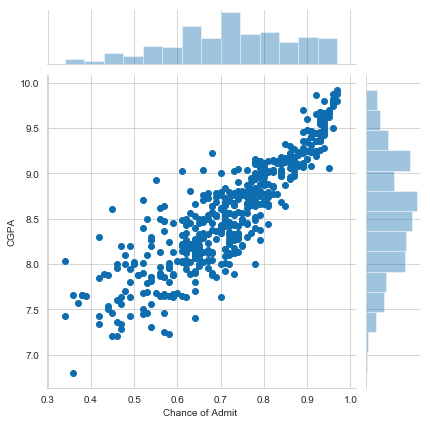

In [46]:
sns.jointplot(x='Chance of Admit ',y='CGPA',data=df,kind='scatter')

**Does Research really doesn't influences the chance of Admission?
Lets find out.**

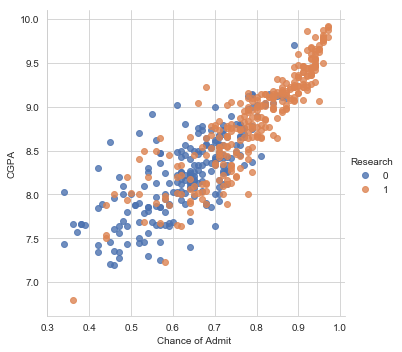

In [47]:
sns.lmplot('Chance of Admit ','CGPA',data=df,hue='Research',fit_reg=False,palette='deep')

**Surprise! Surprise! Research indeed affects the chance of admission. Now lets create our variables for processing.**

In [48]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research',]]
y = df['Chance of Admit ']

* Lets split our data into train and test data.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Since chance of admission is a continuous dependent variable, we'll apply linear regression.**

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [54]:
print("Coefficients: \n", lm.coef_)

Coefficients: 
 [0.00166538 0.00309266 0.00673617 0.00487887 0.01547233 0.11851582
 0.02154477]


In [55]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

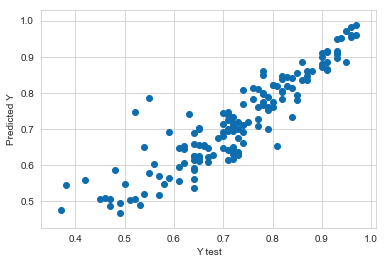

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [57]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))

MAE: 0.040859662891438456


D:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


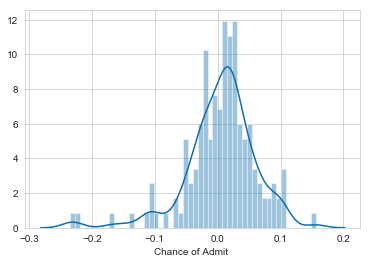

In [58]:
sns.distplot((y_test-predictions),bins=50)

In [59]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
GRE Score,0.001665
TOEFL Score,0.003093
University Rating,0.006736
SOP,0.004879
LOR,0.015472
CGPA,0.118516
Research,0.021545
